Welcome to the Week 1 Economics Problem Set on Dynamic Programming!
Here, we complete all the exercises in Professor Felix Kubler's set.

# Problem 1: 

An asset market equilibrium exists when all agents are maximizing their utility and the sum of the asset holdings for each asset is zero.

In [33]:
import numpy as np
from scipy.optimize import fsolve

## NOTE: A 
def firstordercond(z, *params):
    #define the first order conditions for the asset market equilibrium
    gamma, nn = params
    theta_1_1 = z[0]
    theta_1_2 = z[1]
    theta_2_1 = z[2]
    theta_2_2 = z[3]
    q_1 = z[4]
    q_2 = z[5]
    f = np.zeros(6)
    c_0_1 = 1- q_1*theta_1_1 - q_2 * theta_2_1
    c_0_2 = 1- q_1*theta_1_2 - q_2 * theta_2_2
    c_1_1 = 1 + theta_1_1 + theta_2_1
    c_1_2 = 3 + theta_1_2 + theta_2_2
    c_2_1 = 2 + theta_1_1 + theta_2_1
    c_2_2 = 1 + theta_1_2 + theta_2_2
    c_3_1 = 1 + theta_1_1 + (theta_2_1 * 1.5)
    c_3_2 = 3 + theta_1_2 + (theta_2_2 * 1.5)
    c_4_1 = 2 + theta_1_1 + (theta_2_1 * 1.5)
    c_4_2 = 1 + theta_1_2 + (theta_2_2 * 1.5)
    f[0] = (c_0_1 ** (-gamma))*(-q_1) + .25*((c_1_1** (-gamma)) + (c_2_1 **(-gamma)) + (c_3_1 ** (-gamma)) + (c_4_1**(-gamma)))
    f[1] = (c_0_2 ** -gamma)*(-q_1) + .25*(c_1_2 **-gamma + c_2_2 **-gamma + c_3_2**-gamma + c_4_2**-gamma)
    f[2] = (c_0_1 ** -gamma)*(-q_2) + .25*(c_1_1 **-gamma + c_2_1 **-gamma + (c_3_1**-gamma)*1.5 + (c_4_1**-gamma)*1.5)
    f[3] = (c_0_2 ** -gamma)*(-q_2) + .25*(c_1_2 **-gamma + c_2_2 **-gamma + (c_3_2**-gamma)*1.5 + (c_4_2**-gamma)*1.5)
    f[4] = theta_1_1 + theta_1_2
    f[5] = theta_2_1 + theta_2_2
    return f

In [40]:
nn=0
for gamma in [2., 6., 8., 166.]:

    params = (gamma, nn)
    print("Solution for gamma = {}: in format:\n Asset 1, Person 1;\n Asset 1, Person 2;\n Asset 2, Person 1;\n Asset 2, Person 2;\n Price, Asset 1;\n Price, Asset 2".format(gamma))
    print(fsolve(firstordercond, [0.0,0.0,0.0,0.0,0.0,0.0], args=(params)))

Solution for gamma = 2.0: in format:
 Asset 1, Person 1;
 Asset 1, Person 2;
 Asset 2, Person 1;
 Asset 2, Person 2;
 Price, Asset 1;
 Price, Asset 2
[ 1.95406655e-02 -1.95406655e-02 -1.76151838e-15  1.76151838e-15
  5.89777656e-01  7.37222070e-01]
Solution for gamma = 6.0: in format:
 Asset 1, Person 1;
 Asset 1, Person 2;
 Asset 2, Person 1;
 Asset 2, Person 2;
 Price, Asset 1;
 Price, Asset 2
[ 7.85218861e-04 -7.85218861e-04 -3.07706334e-16  3.07706334e-16
  5.04245349e-01  6.30306687e-01]
Solution for gamma = 8.0: in format:
 Asset 1, Person 1;
 Asset 1, Person 2;
 Asset 2, Person 1;
 Asset 2, Person 2;
 Price, Asset 1;
 Price, Asset 2
[ 1.56094147e-04 -1.56094147e-04  2.14170569e-16 -2.14170569e-16
  5.01014401e-01  6.26268001e-01]
Solution for gamma = 166.0: in format:
 Asset 1, Person 1;
 Asset 1, Person 2;
 Asset 2, Person 1;
 Asset 2, Person 2;
 Price, Asset 1;
 Price, Asset 2
[-6.34718693e-17  6.34718693e-17  7.39777053e-17 -7.39777053e-17
  5.00000000e-01  6.25000000e-01]


# Problem 2:

In [41]:
import numpy as np
def next_move(board, score=0, last_move_parity =None, best_score= -1e30):
    """This takes a tic tac toe board and computes the next best possible move using Bellman equations.
    Format: a tic tac toe board contains 0s, 1s, and -1s, corresponding to empty spaces, X's and O's respectively. 
    If the parity of the sum of board values is even, X moves. Odd, O moves.
    
    A move is an ordered pair (x,y) where x and y are between 0 and 2, a position on the board to put the mark.
    
    Returns: best_move: tuple of move
             board: updated board
             message: either: You win! // You lose! // Your turn!
    """
    for i in range(len(board)):
        if np.abs(np.sum(board[i,:])) == 3 or np.abs(np.sum(board[:,i])) == 3 \
        or np.abs(np.sum(np.diag(board)))==3 or np.abs(np.sum(np.diag(np.fliplr(board)))) ==3:
            message = "You win!"
            board = board
            best_move = None
            return best_move, board, message
        

    temp_board = board.copy()
    possible_moves = []
    
    #determine the set of possible initial moves
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == 0:
                possible_moves.append((i,j))
    print(possible_moves)
    depth = len(possible_moves)
    
    if depth == 0:
        return None, board, "Tie!"
    
    #possible_moves = [(2,0)]
    for move in possible_moves:
        print("Move: {}".format(move))
        
        move_temp = move
        
        if np.sum(board) % 2 == 0:
            move_parity = 0
            board[move[0]][move[1]] = 1   
        else: 
            move_parity = 1
            board[move[0]][move[1]] = -1
        score = move_score(board, move_parity, best_score, depth-1)

        if score >= best_score:
            best_move = move_temp
            best_score = score
        board[move[0]][move[1]] = 0 
        print("Move {} and Score {}".format(move, score))
    if np.sum(board) % 2 == 0:
        board[best_move[0]][best_move[1]] = 1
    else: board[best_move[0]][best_move[1]] = -1
            
            
    message = "Hooray!"
    return best_move, board, message


def move_score(board, move_parity, best_score, depth,score = 0):
    """Calls itself until we're out of moves, computes a overall move score
    for playing the move from next_move based on the possible outcomes of the
    board and the ways to reach them"""
    #determine the set of possible remaining moves

    possible_moves = []
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == 0:
                possible_moves.append((i,j))


    
    row_sums = [np.sum(board[i]) for i in range(len(board))]
    col_sums = [np.sum(board[:,j]) for j in range(len(board[0]))]
    diag_sums = [np.sum(np.diag(board)), np.sum(np.diag(np.fliplr(board)))]
    if move_parity == 0:
        for rowsum, colsum in zip(row_sums, col_sums):
            if rowsum == -3 or colsum == -3:
                return -1 * (2 ** (depth))
            elif rowsum == 3 or colsum ==3:
                return 1 * (2 ** (depth))
        for diag_sum in diag_sums:
            if diag_sum == -3 or diag_sum == -3:
                return -1 * (2 ** (depth))
            elif diag_sum == 3 or diag_sum ==3:
                return 1 * (2 ** (depth))
    else: 
        for rowsum, colsum in zip(row_sums, col_sums):
            if rowsum == 3 or colsum == 3:
                return -1 * (2 ** (depth))
            elif rowsum == -3 or colsum == -3:
                return 1 * (2 ** (depth))
        for diag_sum in diag_sums:
            if diag_sum == 3 or diag_sum ==3:
                return -1 * (2 ** (depth))
            elif diag_sum == -3 or diag_sum == -3:
                return 1 * (2 ** (depth))
    
    if depth == 0:
        return 1

    for move in possible_moves:
        temp_board = board.copy()
        if np.sum(board) % 2 == 0:
            temp_board[move[0]][move[1]] = 1 
        else: 
            temp_board[move[0]][move[1]] = -1
        score += move_score(temp_board, move_parity, best_score, depth-1)
    return score


    


Here, I sample the board playing against itself. Feel free to try playing 
your own game against it! It will not lose, unless you cheat.

In [42]:
board = np.zeros((3,3), dtype=int)
print(board)
print(next_move(board))

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Move: (0, 0)
Move (0, 0) and Score 20496
Move: (0, 1)
Move (0, 1) and Score 10656
Move: (0, 2)
Move (0, 2) and Score 20496
Move: (1, 0)
Move (1, 0) and Score 10656
Move: (1, 1)
Move (1, 1) and Score 30336
Move: (1, 2)
Move (1, 2) and Score 10656
Move: (2, 0)
Move (2, 0) and Score 20496
Move: (2, 1)
Move (2, 1) and Score 10656
Move: (2, 2)
Move (2, 2) and Score 20496
((1, 1), array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]]), 'Hooray!')


In [44]:
print(next_move(board))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Move: (0, 0)
Move (0, 0) and Score -2064
Move: (0, 1)
Move (0, 1) and Score -3216
Move: (0, 2)
Move (0, 2) and Score -2064
Move: (1, 0)
Move (1, 0) and Score -3216
Move: (1, 2)
Move (1, 2) and Score -3216
Move: (2, 0)
Move (2, 0) and Score -2064
Move: (2, 1)
Move (2, 1) and Score -3216
Move: (2, 2)
Move (2, 2) and Score -2064
((2, 2), array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, -1]]), 'Hooray!')


In [45]:
print(next_move(board))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]
Move: (0, 0)
Move (0, 0) and Score 320
Move: (0, 1)
Move (0, 1) and Score 348
Move: (0, 2)
Move (0, 2) and Score 552
Move: (1, 0)
Move (1, 0) and Score 348
Move: (1, 2)
Move (1, 2) and Score 548
Move: (2, 0)
Move (2, 0) and Score 552
Move: (2, 1)
Move (2, 1) and Score 548
((2, 0), array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 1,  0, -1]]), 'Hooray!')


In [46]:
print(next_move(board))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 1)]
Move: (0, 0)
Move (0, 0) and Score -112
Move: (0, 1)
Move (0, 1) and Score -88
Move: (0, 2)
Move (0, 2) and Score 28
Move: (1, 0)
Move (1, 0) and Score -76
Move: (1, 2)
Move (1, 2) and Score -48
Move: (2, 1)
Move (2, 1) and Score -112
((0, 2), array([[ 0,  0, -1],
       [ 0,  1,  0],
       [ 1,  0, -1]]), 'Hooray!')


In [47]:
print(next_move(board))

[(0, 0), (0, 1), (1, 0), (1, 2), (2, 1)]
Move: (0, 0)
Move (0, 0) and Score 2
Move: (0, 1)
Move (0, 1) and Score 2
Move: (1, 0)
Move (1, 0) and Score 2
Move: (1, 2)
Move (1, 2) and Score 24
Move: (2, 1)
Move (2, 1) and Score -10
((1, 2), array([[ 0,  0, -1],
       [ 0,  1,  1],
       [ 1,  0, -1]]), 'Hooray!')


In [48]:
print(next_move(board))

[(0, 0), (0, 1), (1, 0), (2, 1)]
Move: (0, 0)
Move (0, 0) and Score -5
Move: (0, 1)
Move (0, 1) and Score -1
Move: (1, 0)
Move (1, 0) and Score 2
Move: (2, 1)
Move (2, 1) and Score -4
((1, 0), array([[ 0,  0, -1],
       [-1,  1,  1],
       [ 1,  0, -1]]), 'Hooray!')


In [49]:
print(next_move(board))

[(0, 0), (0, 1), (2, 1)]
Move: (0, 0)
Move (0, 0) and Score 2
Move: (0, 1)
Move (0, 1) and Score 2
Move: (2, 1)
Move (2, 1) and Score 2
((2, 1), array([[ 0,  0, -1],
       [-1,  1,  1],
       [ 1,  1, -1]]), 'Hooray!')


In [50]:
print(next_move(board))

[(0, 0), (0, 1)]
Move: (0, 0)
Move (0, 0) and Score -1
Move: (0, 1)
Move (0, 1) and Score 1
((0, 1), array([[ 0, -1, -1],
       [-1,  1,  1],
       [ 1,  1, -1]]), 'Hooray!')


In [51]:
print(next_move(board))

[(0, 0)]
Move: (0, 0)
Move (0, 0) and Score 1
((0, 0), array([[ 1, -1, -1],
       [-1,  1,  1],
       [ 1,  1, -1]]), 'Hooray!')


In [52]:
print(next_move(board))

[]
(None, array([[ 1, -1, -1],
       [-1,  1,  1],
       [ 1,  1, -1]]), 'Tie!')


# Problem 3: Ramsey Model Value Function Iteration

In [53]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as intpl

In [55]:
cap_grid = np.linspace(0.01, 10, 50)
init_guess_state_1 = np.log(cap_grid + 1)
init_guess_state_2 = np.log(cap_grid + 1)
init_guess = np.vstack((init_guess_state_1, init_guess_state_2))
print(init_guess)
print(cap_grid)

[[0.00995033 0.19381982 0.34907471 0.48343345 0.60185951 0.70773415
  0.80346478 0.89082639 0.97116536 1.0455272  1.11474004 1.17947099
  1.24026537 1.29757466 1.35177686 1.40319161 1.45209166 1.49871155
  1.5432545  1.5858977  1.62679658 1.66608826 1.7038943  1.74032295
  1.77547107 1.80942563 1.84226504 1.87406022 1.90487555 1.93476961
  1.96379589 1.99200336 2.01943694 2.04613798 2.07214458 2.09749193
  2.12221266 2.14633698 2.169893   2.19290688 2.21540301 2.23740419
  2.25893171 2.28000555 2.30064444 2.32086595 2.34068666 2.36012212
  2.37918704 2.39789527]
 [0.00995033 0.19381982 0.34907471 0.48343345 0.60185951 0.70773415
  0.80346478 0.89082639 0.97116536 1.0455272  1.11474004 1.17947099
  1.24026537 1.29757466 1.35177686 1.40319161 1.45209166 1.49871155
  1.5432545  1.5858977  1.62679658 1.66608826 1.7038943  1.74032295
  1.77547107 1.80942563 1.84226504 1.87406022 1.90487555 1.93476961
  1.96379589 1.99200336 2.01943694 2.04613798 2.07214458 2.09749193
  2.12221266 2.14633698

In [56]:
def val_func_1(k_j, *args):
    k_init, util, V_t, beta, k_ind = args
    Val_1 = util((0.9*(k_init)**.3 + .3*k_init) - k_j) + beta * (.5 * V_t[0,k_ind] + .5 * V_t[1,k_ind])
    #Val_2 = util((1.1*(k_init)**.3 + .9*k_init) - k_j)[0] + beta * (.5 * V_t[0][k_ind] + .5 * V_t[1][k_ind])
    #Val = np.vstack((Val_1, Val_2))

    return Val_1
    
    
def val_func_2(k_j, *args):
    k_init, util, V_t, beta, k_ind = args
    
    #Val_1 = util((0.9*(k_init)**.3 + .3*k_init) - k_j) + beta * (.5 * V_t[0][k_ind] + .5 * V_t[1][k_ind])
    Val_2 = util((1.1*(k_init)**.3 + .9*k_init) - k_j) + beta * (.5 * V_t[0,k_ind] + .5 * V_t[1,k_ind])
    #Val = np.vstack((Val_1, Val_2))

    return Val_2
    
def util(c):
    if c > 0:
        return np.log(c)
    else: 
        return -5000000

In [57]:
V_new = init_guess.copy()
VF_iter = 0
VF_1_dist = 10
VF_2_dist = 10
VF_maxiter = 2000
VF_mindist = 1e-8
beta = .9
psi_grid = np.zeros(V_new.shape)


while (VF_iter < VF_maxiter) and ((VF_1_dist > VF_mindist)  or (VF_2_dist > VF_mindist)):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros(V_init.shape)
    for k_ind in range(len(cap_grid)):
        val_1_grid = np.zeros(len(cap_grid))
        val_2_grid = np.zeros(len(cap_grid))
        k_init = cap_grid[k_ind]
        
        for k_test in range(len(cap_grid)):
            v_args = (k_init, util, V_init, beta, k_test)
            val_1 = val_func_1(cap_grid[k_test], *v_args)
            val_2 = val_func_2(cap_grid[k_test], *v_args)
            val_1_grid[k_test] = val_1
            val_2_grid[k_test] = val_2
        V_new[0, k_ind] = np.max(val_1_grid)
        V_new[1, k_ind] = np.max(val_2_grid)
        psi_grid[0, k_ind] = cap_grid[np.argmax(val_1_grid)]
        psi_grid[1, k_ind] = cap_grid[np.argmax(val_2_grid)]
    
    VF_1_dist = ((V_init[0] - V_new[0]) ** 2).sum()
    VF_2_dist = ((V_init[1] - V_new[1]) ** 2).sum()
    
    print('VF_iter=', VF_iter, ', VF_1_dist=', VF_1_dist, ', VF_2_dist=', VF_2_dist)


VF_iter= 1 , VF_1_dist= 13.620149871276181 , VF_2_dist= 25.082799860256607
VF_iter= 2 , VF_1_dist= 5.015843783290559 , VF_2_dist= 2.818932244623648
VF_iter= 3 , VF_1_dist= 6.451552891958876 , VF_2_dist= 3.3078554832975016
VF_iter= 4 , VF_1_dist= 6.990579211006037 , VF_2_dist= 4.0269254775133385
VF_iter= 5 , VF_1_dist= 6.570594156520691 , VF_2_dist= 4.7794291732463625
VF_iter= 6 , VF_1_dist= 5.873108893274106 , VF_2_dist= 4.886758716760397
VF_iter= 7 , VF_1_dist= 5.098072057412615 , VF_2_dist= 4.5381840626547945
VF_iter= 8 , VF_1_dist= 4.274860920847115 , VF_2_dist= 4.009018839531579
VF_iter= 9 , VF_1_dist= 3.5180896772287897 , VF_2_dist= 3.40984997247039
VF_iter= 10 , VF_1_dist= 2.8690705352870958 , VF_2_dist= 2.828314562236176
VF_iter= 11 , VF_1_dist= 2.329096781443682 , VF_2_dist= 2.3138387324050482
VF_iter= 12 , VF_1_dist= 1.8881902625978502 , VF_2_dist= 1.882595940004001
VF_iter= 13 , VF_1_dist= 1.530057045532766 , VF_2_dist= 1.5280319352976437
VF_iter= 14 , VF_1_dist= 1.2395901477

VF_iter= 103 , VF_1_dist= 8.882275559595954e-09 , VF_2_dist= 8.882275559536765e-09


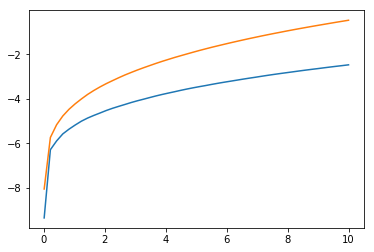

In [58]:
##Plots of the Value Functions:
plt.plot(cap_grid, V_new[0,:])
plt.plot(cap_grid, V_new[1,:])

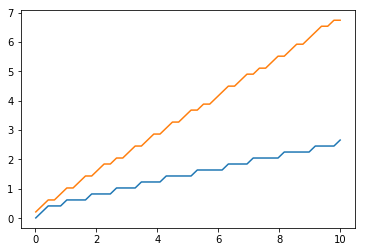

In [59]:
##Plots of the Policy Functions:
plt.plot(cap_grid, psi_grid[0,:])
plt.plot(cap_grid, psi_grid[1,:])

Now we repeat for 500 points on the capital grid to get smoother policy functions.

In [60]:
cap_grid = np.linspace(0.01, 10, 500)
init_guess_state_1 = np.log(cap_grid + 1)
init_guess_state_2 = np.log(cap_grid + 1)
init_guess = np.vstack((init_guess_state_1, init_guess_state_2))
print(init_guess)
print(cap_grid)

V_new = init_guess.copy()
VF_iter = 0
VF_1_dist = 10
VF_2_dist = 10
VF_maxiter = 2000
VF_mindist = 1e-8
beta = .9
psi_grid = np.zeros(V_new.shape)


while (VF_iter < VF_maxiter) and ((VF_1_dist > VF_mindist)  or (VF_2_dist > VF_mindist)):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros(V_init.shape)
    for k_ind in range(len(cap_grid)):
        val_1_grid = np.zeros(len(cap_grid))
        val_2_grid = np.zeros(len(cap_grid))
        k_init = cap_grid[k_ind]
        
        for k_test in range(len(cap_grid)):
            v_args = (k_init, util, V_init, beta, k_test)
            val_1 = val_func_1(cap_grid[k_test], *v_args)
            val_2 = val_func_2(cap_grid[k_test], *v_args)
            val_1_grid[k_test] = val_1
            val_2_grid[k_test] = val_2
        V_new[0, k_ind] = np.max(val_1_grid)
        V_new[1, k_ind] = np.max(val_2_grid)
        psi_grid[0, k_ind] = cap_grid[np.argmax(val_1_grid)]
        psi_grid[1, k_ind] = cap_grid[np.argmax(val_2_grid)]
    
    VF_1_dist = ((V_init[0] - V_new[0]) ** 2).sum()
    VF_2_dist = ((V_init[1] - V_new[1]) ** 2).sum()
    
    print('VF_iter=', VF_iter, ', VF_1_dist=', VF_1_dist, ', VF_2_dist=', VF_2_dist)


[[0.00995033 0.02957826 0.04882834 0.06771483 0.08625124 0.10445028
  0.12232403 0.13988392 0.15714077 0.17410486 0.19078597 0.20719337
  0.22333592 0.23922201 0.25485968 0.27025658 0.28542    0.30035692
  0.31507401 0.32957764 0.34387392 0.3579687  0.37186757 0.3855759
  0.39909886 0.41244139 0.42560823 0.43860396 0.45143296 0.46409946
  0.47660753 0.48896107 0.50116387 0.51321955 0.52513162 0.53690346
  0.54853834 0.5600394  0.57140969 0.58265215 0.59376962 0.60476485
  0.6156405  0.62639914 0.63704326 0.64757528 0.65799753 0.66831227
  0.67852171 0.68862797 0.69863311 0.70853914 0.718348   0.72806158
  0.73768171 0.74721018 0.75664872 0.765999   0.77526266 0.78444129
  0.79353644 0.80254962 0.81148228 0.82033586 0.82911173 0.83781126
  0.84643577 0.85498652 0.86346478 0.87187176 0.88020866 0.88847662
  0.89667678 0.90481025 0.9128781  0.92088138 0.92882112 0.93669831
  0.94451393 0.95226895 0.95996429 0.96760086 0.97517956 0.98270125
  0.99016678 0.997577   1.00493271 1.01223471 1.0

VF_iter= 1 , VF_1_dist= 121.1563720606771 , VF_2_dist= 237.85734451650688
VF_iter= 2 , VF_1_dist= 37.90236709624799 , VF_2_dist= 15.527667242047114
VF_iter= 3 , VF_1_dist= 53.2993827047773 , VF_2_dist= 26.434076020657493
VF_iter= 4 , VF_1_dist= 61.75998264449562 , VF_2_dist= 38.90229960423915
VF_iter= 5 , VF_1_dist= 61.33058008319174 , VF_2_dist= 46.312644607950205
VF_iter= 6 , VF_1_dist= 55.54236991279736 , VF_2_dist= 47.204638575044314
VF_iter= 7 , VF_1_dist= 47.82016240034319 , VF_2_dist= 43.617859350085084
VF_iter= 8 , VF_1_dist= 40.045159149704496 , VF_2_dist= 38.04567515078571
VF_iter= 9 , VF_1_dist= 33.036264708641326 , VF_2_dist= 32.110888210557576
VF_iter= 10 , VF_1_dist= 27.026919536431336 , VF_2_dist= 26.608659859199747
VF_iter= 11 , VF_1_dist= 22.013673979408978 , VF_2_dist= 21.824545619297858
VF_iter= 12 , VF_1_dist= 17.8844265313668 , VF_2_dist= 17.800415542206288
VF_iter= 13 , VF_1_dist= 14.509829875138422 , VF_2_dist= 14.472272233680888
VF_iter= 14 , VF_1_dist= 11.76346

VF_iter= 105 , VF_1_dist= 5.53509027053758e-08 , VF_2_dist= 5.535090270583837e-08
VF_iter= 106 , VF_1_dist= 4.483423119153185e-08 , VF_2_dist= 4.483423119204489e-08
VF_iter= 107 , VF_1_dist= 3.6315727264839536e-08 , VF_2_dist= 3.631572726505148e-08
VF_iter= 108 , VF_1_dist= 2.9415739084466893e-08 , VF_2_dist= 2.941573908428636e-08
VF_iter= 109 , VF_1_dist= 2.3826748658511376e-08 , VF_2_dist= 2.3826748658615608e-08
VF_iter= 110 , VF_1_dist= 1.9299666413757857e-08 , VF_2_dist= 1.9299666413492987e-08
VF_iter= 111 , VF_1_dist= 1.5632729794861284e-08 , VF_2_dist= 1.563272979508725e-08
VF_iter= 112 , VF_1_dist= 1.266251113351493e-08 , VF_2_dist= 1.2662511133552924e-08
VF_iter= 113 , VF_1_dist= 1.0256634018308001e-08 , VF_2_dist= 1.0256634018493045e-08
VF_iter= 114 , VF_1_dist= 8.307873554829842e-09 , VF_2_dist= 8.307873554753813e-09


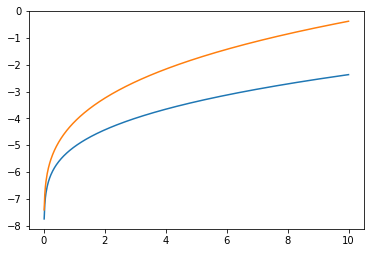

In [61]:
#500 Point grid, Value Functions
plt.plot(cap_grid, V_new[0,:])
plt.plot(cap_grid, V_new[1,:])

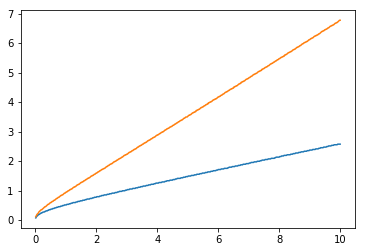

In [62]:
#500 Point grid, Policy Functions
plt.plot(cap_grid, psi_grid[0,:])
plt.plot(cap_grid, psi_grid[1,:])

# Problem 4: Stochastic Ramsey Model, Time Iteration Collocation

## Problem 4a) Discrete Shocks

First we define some useful functions, including an interpolator that returns a function handle depending on the desired method.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from numpy.polynomial import chebyshev


In [69]:
def util(c):
    if c > 0:
        return np.log(c)
    else: 
        return -5000000
    
d_util = lambda x: 1.0/ x

##interpolation function that returns function handle given interp type
def interpolate(k_grid, policy, method="pw-linear", ndegree=None, A=none ):
    if method == "pw-linear":
        t = interp.interp1d(k_grid, policy, kind='linear',fill_value="extrapolate")
            
    elif method == "chebyshev":
        ###Get chebyshev coefficients 
        coeff = chebyshev.chebfit(k_grid, policy, ndegree)
        t = lambda x: chebyshev.chebval(x, coeff)

    elif method == "cubic-spline":
        t = interp.interp1d(k_grid, policy, kind='cubic',fill_value="extrapolate")
        
    else: raise NameError("invalid choice of interpolation method. Valid methods are \
                           'pw-linear,' 'chebyshev,' 'cubic-spline,' or 'ar_1'")
    return t

production_1 = lambda k: 0.9*k**.3 + .3*k

production_2 = lambda k: 1.1*k**.3 + .9*k

d_production_1 = lambda k: .27*(k**(-.7)) + .3

d_production_2 = lambda k: .33*(k**(-.7)) + .9

def get_cheby_roots(ndegree, k_beg, k_end):
    """Returns roots for chebyshev polynomial of degree ndegree with 
    bounds on capital
    """
    ##get the chebyshev zeros in our interval
    k_beg = k_grid[0]
    k_end = k_grid[-1]
    k_grid_cheby = np.zeros(ndegree + 1)

    for i in range(np.size(k_grid_cheby)):
        k_grid_cheby[i] = .5 *(k_end + k_beg) + .5*(k_end - k_beg)*np.cos(np.pi*((2*(i+1)-1.)/(2*np.size(k_grid_cheby))))
    k_grid_cheby.sort()
    
    return k_grid_cheby


### Two Euler Equations, 1 for each state:

In [70]:
beta = .9

###define our 2 updating Euler equations (1 for each state) that we need to solve in order to 
###determine the optimal policy in each iteration
def state_1_eq(k_plus_j, *parameters):
    """State 1 Equation: 
    Parameters: 
        k_plus_j: variable, will be optimized
        k_j: level of capital for which to find optimal policy
        d_util : derivative of utility func
        prod_1 : production in state 1
        d_prod_1: derivative of production in state 1
        prod_2 : production in state 2
        d_prod_2: derivative of production in state 2
        interp_1: interpolated policy function given state 1
        interp_2: interpolated policy function given state 2 
        beta = discount factor
        """
    k_j, d_util, prod_1, d_prod_1, prod_2, d_prod_2, \
    interp_1, interp_2, beta = parameters
    value = d_util(prod_1(k_j)-k_plus_j) - beta * (.5 * d_prod_1(k_plus_j) *d_util((prod_1(k_plus_j)-interp_1(k_plus_j))) + \
                                                  .5 * d_prod_2(k_plus_j) *d_util((prod_2(k_plus_j)-interp_2(k_plus_j))))
    return value
    
def state_2_eq(k_plus_j, *parameters):
    """State 2 Equation: 
    Parameters: 
        k_plus_j: variable, will be optimized
        k_j: level of capital for which to find optimal policy
        d_util : derivative of utility func
        prod_1 : production in state 1
        d_prod_1: derivative of production in state 1
        prod_2 : production in state 2
        d_prod_2: derivative of production in state 2
        interp_1: interpolated policy function given state 1
        interp_2: interpolated policy function given state 2 
        beta = discount factor
        """
    k_j, d_util, prod_1, d_prod_1, prod_2, d_prod_2, \
    interp_1, interp_2, beta = parameters
    
    value = d_util(prod_2(k_j)-k_plus_j) - beta * (.5 * d_prod_1(k_plus_j) *d_util((prod_1(k_plus_j)-interp_1(k_plus_j))) + \
                                                  .5 * d_prod_2(k_plus_j) *d_util((prod_2(k_plus_j)-interp_2(k_plus_j))))
    return value

In [71]:
import scipy.optimize as optimize
##perform policy time iteration, Piecewise Linear
k_grid = np.linspace(0.01, 10, 30)
## Set initial policy to a 2 by 50 array, first row is K+_1, second K+_2
init_policy = np.repeat(np.expand_dims(np.log(k_grid + 1),0), 2, axis=0)
updated_policy = init_policy
interp_1 = interpolate(k_grid, init_policy[0])
interp_2 = interpolate(k_grid, init_policy[1])
time_iter = 0
time_1_dist = 10
time_2_dist = 10
time_maxiter = 2000
time_mindist = 1e-8
beta = .9

while (time_iter < time_maxiter) and ((time_1_dist > time_mindist)  or (time_2_dist > time_mindist)):
    time_iter += 1
    init_policy = updated_policy
    updated_policy = np.zeros(init_policy.shape)
    for ind, k_ind in enumerate(k_grid):
      
        parameters = (k_ind, d_util, production_1, d_production_1, production_2, d_production_2, \
        interp_1, interp_2, beta)

        solve1 = optimize.root(state_1_eq, interp_1(k_ind), method='hybr', args=(parameters))
        updated_policy[0, ind] = solve1.x
        solve2 = optimize.root(state_2_eq, interp_2(k_ind), method='hybr', args=(parameters))
        updated_policy[1, ind] = solve2.x
    interp_1 = interpolate(k_grid, updated_policy[0])
    interp_2 = interpolate(k_grid, updated_policy[1])
    time_1_dist = ((updated_policy[0] - init_policy[0]) ** 2).sum()
    time_2_dist = ((updated_policy[1] - init_policy[1]) ** 2).sum()
    
    
    print('time_iter=', time_iter, ', time_1_dist=', time_1_dist, ', time_2_dist=', time_2_dist)
    

time_iter= 1 , time_1_dist= 1.4921014492293778 , time_2_dist= 133.68893433623595
time_iter= 2 , time_1_dist= 0.044551889931155816 , time_2_dist= 1.8573505721157195
time_iter= 3 , time_1_dist= 0.013444919984078443 , time_2_dist= 0.027229049682233664
time_iter= 4 , time_1_dist= 0.00125278588479552 , time_2_dist= 0.011918348630227255
time_iter= 5 , time_1_dist= 5.534697208843481e-05 , time_2_dist= 0.0027364812035974555
time_iter= 6 , time_1_dist= 4.211174525964403e-05 , time_2_dist= 0.00014536693334595837
time_iter= 7 , time_1_dist= 2.2952776705508456e-05 , time_2_dist= 2.6325839860017557e-05
time_iter= 8 , time_1_dist= 8.058422958033692e-06 , time_2_dist= 2.7851516332002136e-05
time_iter= 9 , time_1_dist= 2.3289238017788164e-06 , time_2_dist= 1.281261378699634e-05
time_iter= 10 , time_1_dist= 6.116805961337635e-07 , time_2_dist= 4.195489788592359e-06
time_iter= 11 , time_1_dist= 1.5281105919933457e-07 , time_2_dist= 1.174607897222484e-06
time_iter= 12 , time_1_dist= 3.715764197969236e-08

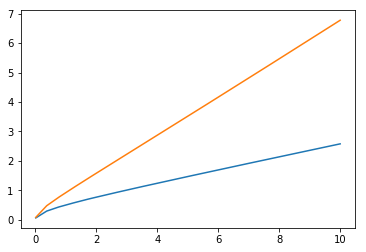

In [72]:
plot_grid = np.linspace(.01, 10, 10000)
plt.plot(plot_grid, interp_1(plot_grid))
plt.plot(plot_grid, interp_2(plot_grid))

### Interpolating with Cubic Splines

time_iter= 1 , time_1_dist= 24.804308194701076 , time_2_dist= 2184.3137582515383
time_iter= 2 , time_1_dist= 0.7432494742704301 , time_2_dist= 29.425074217109078
time_iter= 3 , time_1_dist= 0.22940165055032816 , time_2_dist= 0.4256419089956588
time_iter= 4 , time_1_dist= 0.020967098848993625 , time_2_dist= 0.19921515683438482
time_iter= 5 , time_1_dist= 0.00118902664994031 , time_2_dist= 0.04580100878161592
time_iter= 6 , time_1_dist= 0.0010317370584142904 , time_2_dist= 0.002443278461942564
time_iter= 7 , time_1_dist= 0.000570192377919071 , time_2_dist= 0.0007100270191960954
time_iter= 8 , time_1_dist= 0.00020825244512984062 , time_2_dist= 0.0007005785924513796
time_iter= 9 , time_1_dist= 6.283048063338533e-05 , time_2_dist= 0.00032518194969460406
time_iter= 10 , time_1_dist= 1.719183770255916e-05 , time_2_dist= 0.000110164923092644
time_iter= 11 , time_1_dist= 4.459894024646471e-06 , time_2_dist= 3.2064216283426597e-05
time_iter= 12 , time_1_dist= 1.1226230768075673e-06 , time_2_dist

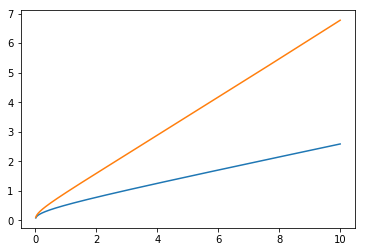

In [73]:
##perform policy time iteration, Cubic Splines
k_grid = np.linspace(0.01, 10, 500)
## Set initial policy to a 2 by 50 array, first row is K+_1, second K+_2
init_policy = np.repeat(np.expand_dims(np.log(k_grid + 1),0), 2, axis=0)
updated_policy = init_policy
interp_1 = interpolate(k_grid, init_policy[0], method = 'cubic-spline')
interp_2 = interpolate(k_grid, init_policy[1], method = 'cubic-spline')
time_iter = 0
time_1_dist = 10
time_2_dist = 10
time_maxiter = 2000
time_mindist = 1e-8
beta = .9

while (time_iter < time_maxiter) and ((time_1_dist > time_mindist)  or (time_2_dist > time_mindist)):
    time_iter += 1
    init_policy = updated_policy
    updated_policy = np.zeros(init_policy.shape)
    for ind, k_ind in enumerate(k_grid):
      
        parameters = (k_ind, d_util, production_1, d_production_1, production_2, d_production_2, \
        interp_1, interp_2, beta)

        solve1 = optimize.root(state_1_eq, interp_1(k_ind), method='hybr', args=(parameters))
        updated_policy[0, ind] = solve1.x
        solve2 = optimize.root(state_2_eq, interp_2(k_ind), method='hybr', args=(parameters))
        updated_policy[1, ind] = solve2.x
    interp_1 = interpolate(k_grid, updated_policy[0], method='cubic-spline')
    interp_2 = interpolate(k_grid, updated_policy[1], method='cubic-spline')
    time_1_dist = ((updated_policy[0] - init_policy[0]) ** 2).sum()
    time_2_dist = ((updated_policy[1] - init_policy[1]) ** 2).sum()
    
    print('time_iter=', time_iter, ', time_1_dist=', time_1_dist, ', time_2_dist=', time_2_dist)
    
plot_grid = np.linspace(.01, 10, 10000)
plt.plot(plot_grid, interp_1(plot_grid))
plt.plot(plot_grid, interp_2(plot_grid))

### Different Utility, Beta = .999

time_iter= 1 , time_1_dist= 16.522122858501596 , time_2_dist= 598.7398280222847
time_iter= 2 , time_1_dist= 0.3186265470556284 , time_2_dist= 16.974507948719776
time_iter= 3 , time_1_dist= 0.016457707582944795 , time_2_dist= 0.8979072880193572
time_iter= 4 , time_1_dist= 0.0019335682998056168 , time_2_dist= 0.12268669216860136
time_iter= 5 , time_1_dist= 0.0002614237644063222 , time_2_dist= 0.024628352806478043
time_iter= 6 , time_1_dist= 3.783703360579881e-05 , time_2_dist= 0.005529248944143479
time_iter= 7 , time_1_dist= 6.69628475875789e-06 , time_2_dist= 0.0012612207927123495
time_iter= 8 , time_1_dist= 1.846776987081096e-06 , time_2_dist= 0.0002828728026899223
time_iter= 9 , time_1_dist= 1.2299179539358034e-06 , time_2_dist= 6.371180083842178e-05
time_iter= 10 , time_1_dist= 1.5021739067570497e-06 , time_2_dist= 1.621008012666255e-05
time_iter= 11 , time_1_dist= 1.7750982029741546e-06 , time_2_dist= 5.930770279840282e-06
time_iter= 12 , time_1_dist= 1.7951270561781358e-06 , time_2

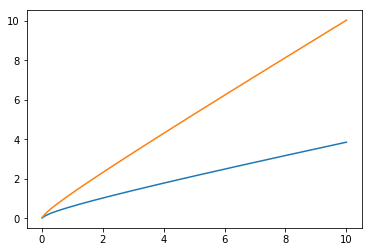

In [74]:
##perform policy time iteration, u = -c ** -4; beta = .999

##We use a different utility here
d_util_2 = lambda x : 4*x**-5
k_grid = np.linspace(0.01, 10, 50)
## Set initial policy to a 2 by 50 array, first row is K+_1, second K+_2
init_policy = np.repeat(np.expand_dims(np.log(k_grid + 1),0), 2, axis=0)
updated_policy = init_policy
interp_1 = interpolate(k_grid, init_policy[0], method = 'cubic-spline')
interp_2 = interpolate(k_grid, init_policy[1], method = 'cubic-spline')
time_iter = 0
time_1_dist = 10
time_2_dist = 10
time_maxiter = 2000
time_mindist = 1e-8
beta = .999

while (time_iter < time_maxiter) and ((time_1_dist > time_mindist)  or (time_2_dist > time_mindist)):
    time_iter += 1
    init_policy = updated_policy
    updated_policy = np.zeros(init_policy.shape)
    for ind, k_ind in enumerate(k_grid):
      
        parameters = (k_ind, d_util_2, production_1, d_production_1, production_2, d_production_2, \
        interp_1, interp_2, beta)

        solve1 = optimize.root(state_1_eq, interp_1(k_ind), method='hybr', args=(parameters))
        updated_policy[0, ind] = solve1.x
        solve2 = optimize.root(state_2_eq, interp_2(k_ind), method='hybr', args=(parameters))
        updated_policy[1, ind] = solve2.x
    interp_1 = interpolate(k_grid, updated_policy[0], method='cubic-spline')
    interp_2 = interpolate(k_grid, updated_policy[1], method='cubic-spline')
    time_1_dist = ((updated_policy[0] - init_policy[0]) ** 2).sum()
    time_2_dist = ((updated_policy[1] - init_policy[1]) ** 2).sum()
    
    print('time_iter=', time_iter, ', time_1_dist=', time_1_dist, ', time_2_dist=', time_2_dist)
    
plot_grid = np.linspace(.01, 10, 10000)
plt.plot(plot_grid, interp_1(plot_grid))
plt.plot(plot_grid, interp_2(plot_grid))

# Chebyshev Polynomials (Degree 5)


time_iter= 1 , time_1_dist= 0.27515702964787253 , time_2_dist= 30.322605580199163
time_iter= 2 , time_1_dist= 0.009919286024543898 , time_2_dist= 0.5247383262147607
time_iter= 3 , time_1_dist= 0.0033977776170829917 , time_2_dist= 0.006560959698789524
time_iter= 4 , time_1_dist= 0.00042152322517953575 , time_2_dist= 0.0028767813146135957
time_iter= 5 , time_1_dist= 2.0422181801932214e-05 , time_2_dist= 0.0009273432156650539
time_iter= 6 , time_1_dist= 1.155744919310939e-06 , time_2_dist= 9.146989176724601e-05
time_iter= 7 , time_1_dist= 1.1670898364623567e-06 , time_2_dist= 2.444820407940326e-06
time_iter= 8 , time_1_dist= 5.3910019900949e-07 , time_2_dist= 9.093442300796796e-07
time_iter= 9 , time_1_dist= 1.704364730853147e-07 , time_2_dist= 7.526308116381028e-07
time_iter= 10 , time_1_dist= 4.521675702989135e-08 , time_2_dist= 2.967729566757489e-07
time_iter= 11 , time_1_dist= 1.0940051372077985e-08 , time_2_dist= 8.761860737072397e-08
time_iter= 12 , time_1_dist= 2.5134185054295045e-

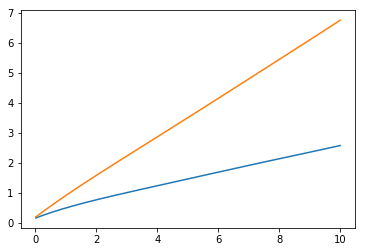

In [75]:
##perform policy time iteration, Chebyshev Polynomials
k_beg = .01
k_end = 10
k_grid_cheby = get_cheby_roots(5, k_beg, k_end)
## Set initial policy to a 2 by 50 array, first row is K+_1, second K+_2
init_policy = np.repeat(np.expand_dims(np.log(k_grid_cheby + 1),0), 2, axis=0)
updated_policy = init_policy
interp_1 = interpolate(k_grid_cheby, init_policy[0], method = 'chebyshev', ndegree=5)
interp_2 = interpolate(k_grid_cheby, init_policy[1], method = 'chebyshev', ndegree=5)
time_iter = 0
time_1_dist = 10
time_2_dist = 10
time_maxiter = 2000
time_mindist = 1e-8
beta = .9

while (time_iter < time_maxiter) and ((time_1_dist > time_mindist)  or (time_2_dist > time_mindist)):
    time_iter += 1
    init_policy = updated_policy
    updated_policy = np.zeros(init_policy.shape)
    for ind, k_ind in enumerate(k_grid_cheby):
      
        parameters = (k_ind, d_util, production_1, d_production_1, production_2, d_production_2, \
        interp_1, interp_2, beta)

        solve1 = optimize.root(state_1_eq, interp_1(k_ind), method='hybr', args=(parameters))
        updated_policy[0, ind] = solve1.x
        solve2 = optimize.root(state_2_eq, interp_2(k_ind), method='hybr', args=(parameters))
        updated_policy[1, ind] = solve2.x
        
    interp_1 = interpolate(k_grid_cheby, updated_policy[0], method='chebyshev', ndegree=5)
    interp_2 = interpolate(k_grid_cheby, updated_policy[1], method='chebyshev', ndegree=5)
    time_1_dist = ((updated_policy[0] - init_policy[0]) ** 2).sum()
    time_2_dist = ((updated_policy[1] - init_policy[1]) ** 2).sum()
    
    print('time_iter=', time_iter, ', time_1_dist=', time_1_dist, ', time_2_dist=', time_2_dist)
    
plot_grid = np.linspace(.01, 10, 10000)
plt.plot(plot_grid, interp_1(plot_grid))
plt.plot(plot_grid, interp_2(plot_grid))




print("This is ultra-fast!")

## Problem 4(b): AR(1) Shocks

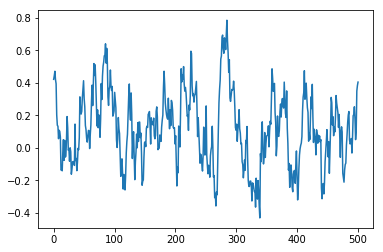

In [76]:
import ar1_approx

def util(c):
    if c > 0:
        return np.log(c)
    else: 
        return -5000000
    
d_util = lambda x: 1.0/ x

def AR_1(A_prev):
    A_new = .9*A_prev + .1*np.random.randn()
    return A_new

def production(A_t, k):
    return np.exp(A_t)*(k**.3) +.5*k

def d_production_k(A_t, k):
    return .3* np.exp(A_t)*(k**(-.7)) + .5

def sim_AR_1(A_start, sim_len):
    AR_1_out = np.zeros(sim_len)
    for i in range(sim_len):
        A_new = AR_1(A_start)
        A_start = A_new
        AR_1_out[i] = A_new
    plt.plot(np.linspace(0, sim_len, sim_len), AR_1_out)
    return

sim_AR_1(.5, 500)

In [77]:
def euler_eqn_AR_1(k_plus_j, *parameters):
    """
    State Equation: 
    
    Parameters: 
        k_plus_j: variable, will be optimized
        k_grid_ind: index of capital 
        K_Grid: 2D capital grid, comes from np.meshgrid
        A_Grid: 2D A grid, comes from np.meshgrid
        a_grid_ind: index of A
        pi_mat: transition probability matrix for discretized approx to AR(1)
        interp: interpolated 2D policy function for the current shock
        d_util : derivative of utility func
        prod : production function, takes A_t and capital as variables
        d_prod_1: derivative of production function wrt captial
        beta = discount factor
    """
    k_grid_ind, a_grid_ind, K_Grid, A_Grid, pi_mat, interp, \
    d_util, prod, d_prod, beta = parameters
    
    curr_A = A_Grid[a_grid_ind]
    curr_K = K_Grid[k_grid_ind]
    shock_exp = 0 
    
    for j in range(len(A_Grid)):
        shock_exp += pi_mat[a_grid_ind,j] * d_prod(A_Grid[j], k_plus_j) * \
        d_util((prod(A_Grid[j],k_plus_j) - interp(k_plus_j)))

    value = d_util(prod(curr_A, curr_K)- k_plus_j) - beta * shock_exp
    
    
    return value 


In [78]:
##Perform 2D policy time iteration with an Markov-process approximated AR(1) Process
##We use the tauchenhussey function from ar1_approx.py to compute both the A_Grid and the Transition matrix
k_grid = np.linspace(0.01, 10, 15)
A, A_trans = ar1_approx.tauchenhussey(len(k_grid), 0, .9, .1, .1)
a_grid = A[0]

print(a_grid)

#K_Grid, A_Grid = np.meshgrid(k_grid, A)
init_policy = np.repeat(np.expand_dims(np.log(k_grid + 1),0), len(a_grid), axis=0)
updated_policy = init_policy
interpolations = []
for i in range(np.size(a_grid)):
    interpolations.append(interpolate(k_grid, updated_policy[i]))


time_iter = 0
time_dist = 10
time_maxiter = 2000
time_mindist = 1e-8
beta = .99

while (time_iter < time_maxiter) and (time_dist > time_mindist):
    
    time_iter += 1
    init_policy = updated_policy
    updated_policy = np.zeros(init_policy.shape)
    for a_ind in range(np.size(a_grid)):
        for k_ind in range(np.size(k_grid)):
            parameters = (k_ind, a_ind, k_grid, a_grid, A_trans, interpolations[a_ind], \
                            d_util, production, d_production_k, beta)
            curr_k = k_grid[k_ind]
            solve = optimize.root(euler_eqn_AR_1, interpolations[a_ind](curr_k), method='hybr', args=(parameters))
            updated_policy[a_ind, k_ind] = solve.x
        interpolations[a_ind] = interpolate(k_grid, updated_policy[a_ind,:])
        
    

    time_dist = ((updated_policy- init_policy) ** 2).sum()
    
    
    print('time_iter=', time_iter, ', time_dist=', time_dist)

 
    

[-0.63639479 -0.51900936 -0.41962077 -0.32890824 -0.32890824 -0.32890824
 -0.32890824 -0.32890824  0.32890824  0.32890824  0.32890824  0.32890824
  0.41962077  0.51900936  0.63639479]
time_iter= 1 , time_dist= 147.75510304659534
time_iter= 2 , time_dist= 7.968053648346616
time_iter= 3 , time_dist= 1.6700919820099434
time_iter= 4 , time_dist= 0.9193819698853629
time_iter= 5 , time_dist= 0.2369568918664926
time_iter= 6 , time_dist= 0.09298808950908252
time_iter= 7 , time_dist= 0.04411145058271876
time_iter= 8 , time_dist= 0.022565096478568695
time_iter= 9 , time_dist= 0.012032569697346878
time_iter= 10 , time_dist= 0.006593530592624685
time_iter= 11 , time_dist= 0.003689144052760802
time_iter= 12 , time_dist= 0.0021009093350761506
time_iter= 13 , time_dist= 0.0012122470081237322
time_iter= 14 , time_dist= 0.0007034312388097154
time_iter= 15 , time_dist= 0.00041436044064218725
time_iter= 16 , time_dist= 0.0002468045377357377
time_iter= 17 , time_dist= 0.00014809359806604397
time_iter= 18 

We plot the policy functions for all of the possible shocks in our discretized AR(1) approximation.

Text(0,0.5,'Investment Policy')

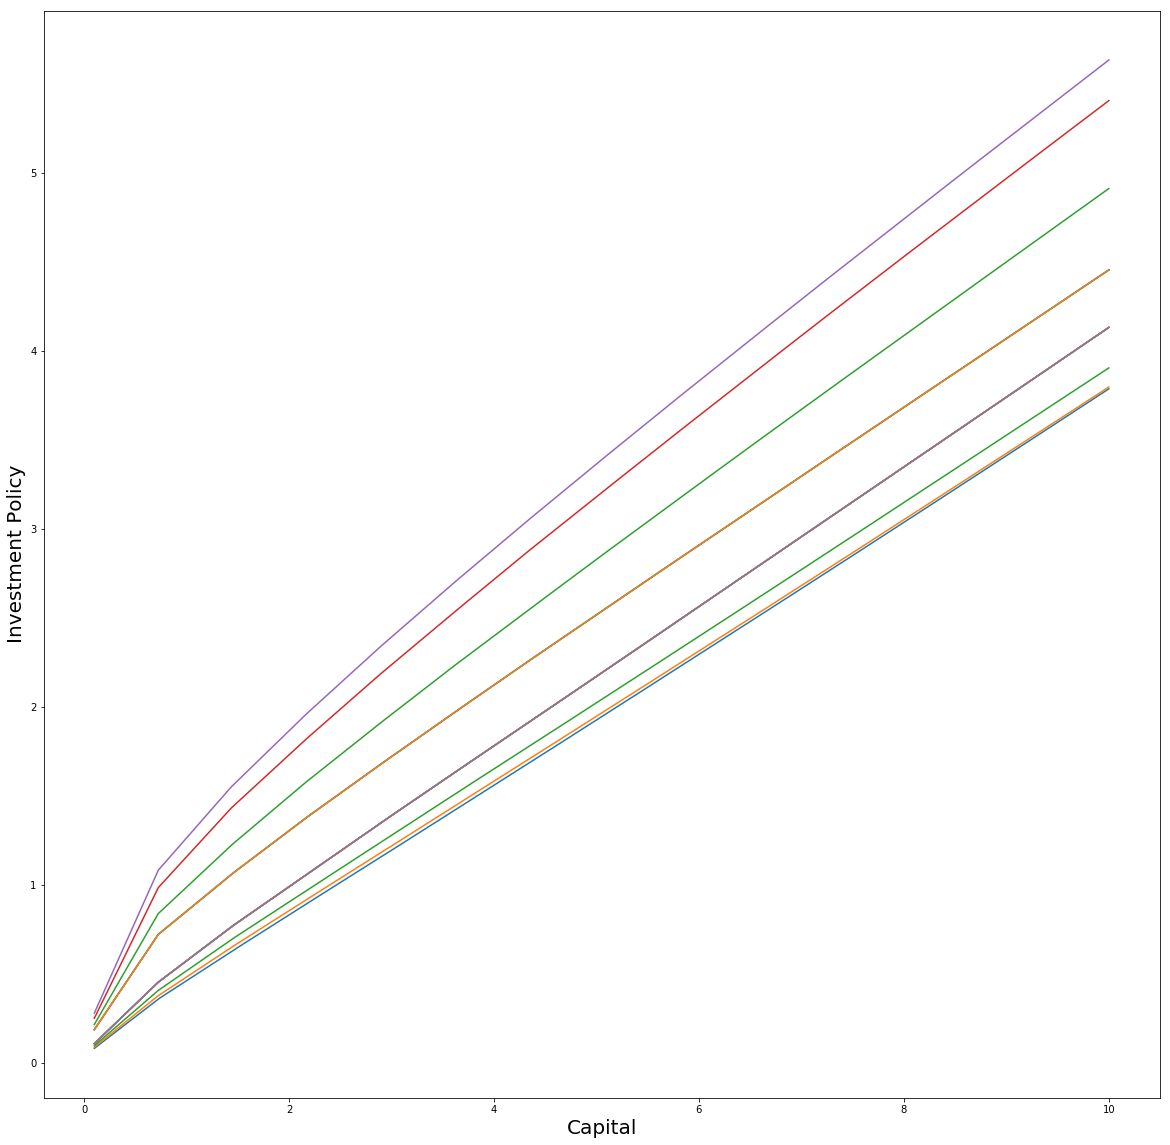

In [81]:
x = np.linspace(0.1, 10, 1000)
plt.figure(figsize=(20,20))
for i in range(len(interpolations)):
    plt.plot(x, interpolations[i](x)) 
plt.xlabel("Capital", fontsize= 20)
plt.ylabel("Investment Policy", fontsize = 20)